<h1 style="background-color: #4DA733; color: white; padding: 10px; text-align: center; border-radius: 8px; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold;"> Dengue Cases Prediction Model Base on Weather Factors </h1>

<h3 style="color:green">Dengue Dataset Column names description</h3>

1. `District` - The Administrative districts in Sri Lanka

2. `Number_of_Cases` - Dengue cases reported weekly 

3. `Week_Start_Date` - The Starting date for the reported cases

4. `Month` - The Month the cases were reported

5. `Year` - The Year the cases were reported

6. `Week` - The Week the cases were reported

7. `Week_End_Date` - The Ending date for the reported cases

8. `Avg Max Temp (°C)` - The Average maximum temperature measured in degree Celsius

9. `Avg Min Temp (°C)` - The Average minimum temperature measured in degree Celsius

10. `Avg Apparent Max Temp (°C)` - The Average Apparent maximum temperature measured in degree Celsius

11. `Avg Apparent Min Temp (°C)` - The Average Apparent minimum temperature measured in degree Celsius

12. `Total Precipitation (mm)` - The Total Precipitation measured in millimetres 

13. `Total Rain (mm)` - The Total Precipitation measured in millimetres

14. `Avg Wind Speed (km/h)` - The Average wind speed measured in kilometre per hour

15. `Max Wind Gusts (km/h)` - The Maximum wind gust speed measured in kilometre per hour

16. `Weather Code` - Code representing weather conditions

17. `Avg Daylight Duration (hours)` - The Average daylight duration measured in hours

18. `Avg Sunrise Time` - The Average Sunrise Time

19. `Avg Sunset Time` - The Average Sunset Time

`Number_of_Cases`
This is the variable you want to predict (dengue cases).

### The feature columns (independent variables) are:

- District
- Week_Start_Date
- Month
- Year
- Week
- Week_End_Date
- Avg Max Temp (°C)
- Avg Min Temp (°C)
- Avg Apparent Max Temp (°C)
- Avg Apparent Min Temp (°C)
- Total Precipitation (mm)
- Total Rain (mm)
- Avg Wind Speed (km/h)
- Max Wind Gusts (km/h)
- Weather Code
- Avg Daylight Duration (hours)
- Avg Sunrise Time
- Avg Sunset Time


<span style="background-color:#4DA733;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> IMPORT ESSENTIAL LIBRARIES
</span>

In [5]:
import pandas as pd
import numpy as np

In [6]:
#showing max rows

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [7]:
#Keep the notebook clean from warnings

import warnings
warnings.filterwarnings('ignore')

<span style="background-color:#4DA733;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> LOAD AND EXPLORING DATA
</span>

In [9]:
dengue_case_df = pd.read_csv("./dataset/Sri_lanka_dengue_cases_weather_weekly_2007_2024_.csv")
dengue_case_df.head()

District  Number_of_Cases Week_Start_Date  Month  Year  Week Week_End_Date  \
0   Ampara                0      2007-01-01      1  2007     1    2007-01-08   
1   Ampara                0      2007-01-08      1  2007     2    2007-01-15   
2   Ampara                0      2007-01-15      1  2007     3    2007-01-22   
3   Ampara                0      2007-01-22      1  2007     4    2007-01-29   
4   Ampara                0      2007-01-29      1  2007     5    2007-02-05   

   Avg Max Temp (°C)  Avg Min Temp (°C)  Avg Apparent Max Temp (°C)  \
0            26.9375            21.8625                     28.8500   
1            26.3500            23.3250                     30.2625   
2            27.2125            23.1625                     29.5750   
3            26.7250            23.0375                     29.9500   
4            27.3625            22.9625                     30.7500   

   Avg Apparent Min Temp (°C)  Total Precipitation (mm)  Total Rain (mm)  \
0                     24.1000                       8.0              8.0   
1                     26.7000                      86.1             86.1   
2                     25.9625                       3.1              3.1   
3                     26.1125                      53.6             53.6   
4                     26.1250                       8.2              8.2   

   Avg Wind Speed (km/h)  Max Wind Gusts (km/h)  Weather Code  \
0                18.2000                   44.3             3   
1                17.0250                   43.6            53   
2                20.1875                   48.2            51   
3                17.2000                   42.5            61   
4                17.2625                   40.0            51   

   Avg Daylight Duration (hours)  Avg Sunrise Time  Avg Sunset Time  
0                      11.714583               376             1079  
1                      11.733333               378             1082  
2                      11.754167               380             1085  
3                      11.783333               381             1088  
4                      11.812500               382             1090

In [10]:
dengue_case_df.shape

(22950, 19)

**`22950`** : rows in dataset

**`19`** : columns in dataset

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Dataset Information</span>

In [13]:
dengue_case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District                       22950 non-null  object 
 1   Number_of_Cases                22950 non-null  int64  
 2   Week_Start_Date                22950 non-null  object 
 3   Month                          22950 non-null  int64  
 4   Year                           22950 non-null  int64  
 5   Week                           22950 non-null  int64  
 6   Week_End_Date                  22950 non-null  object 
 7   Avg Max Temp (°C)              22950 non-null  float64
 8   Avg Min Temp (°C)              22950 non-null  float64
 9   Avg Apparent Max Temp (°C)     22950 non-null  float64
 10  Avg Apparent Min Temp (°C)     22950 non-null  float64
 11  Total Precipitation (mm)       22950 non-null  float64
 12  Total Rain (mm)                22950 non-null 

#Statistical Information of the Numeric Columns

dengue_case_df.describe()

In [15]:
#Statistical Information of the Categorical Columns

dengue_case_df.describe(include=['O'])

District Week_Start_Date Week_End_Date
count     22950           22950         22950
unique       25             916           916
top      Ampara      2024-04-08    2024-04-15
freq        918              50            50

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Data Visualization</span>

<h2>Import Libraries for Data Visuzalization</h2>

In [18]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2>Customize Style and Background</h2>

In [20]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<h2>Dengue Case Visualization</h2>

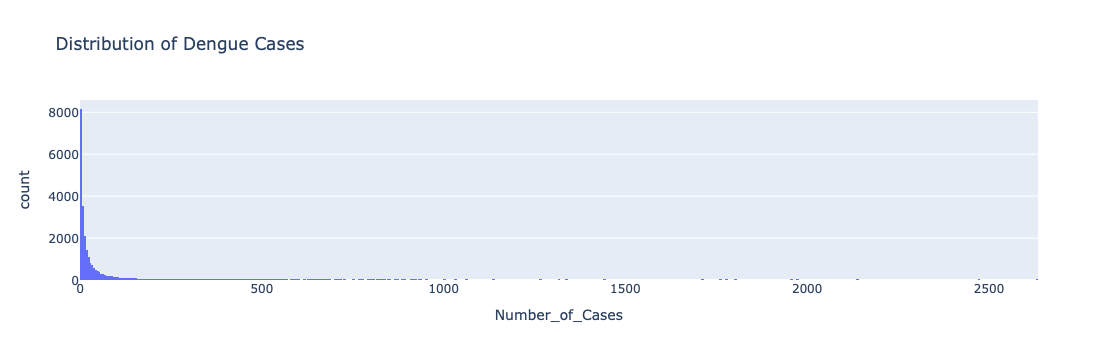

In [22]:
px.histogram(dengue_case_df, x="Number_of_Cases", title="Distribution of Dengue Cases")

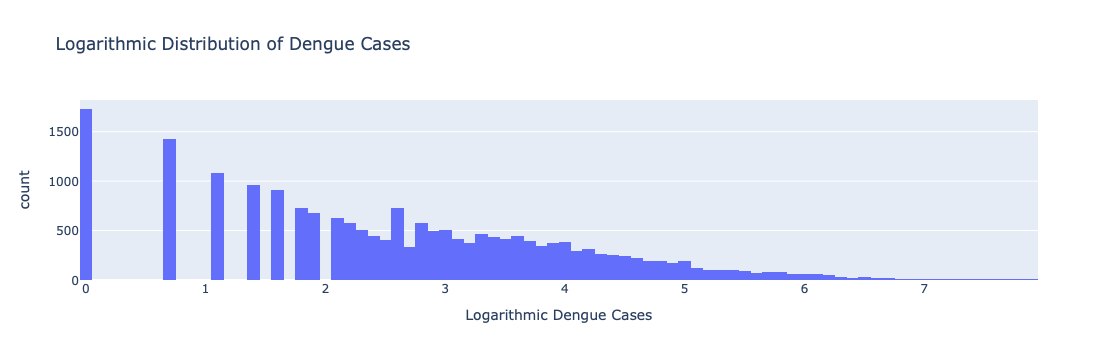

In [23]:
px.histogram(x=np.log(dengue_case_df["Number_of_Cases"]), title="Logarithmic Distribution of Dengue Cases").update_layout(xaxis_title="Logarithmic Dengue Cases")

<h2>Year-wise Dengue Cases</h2>

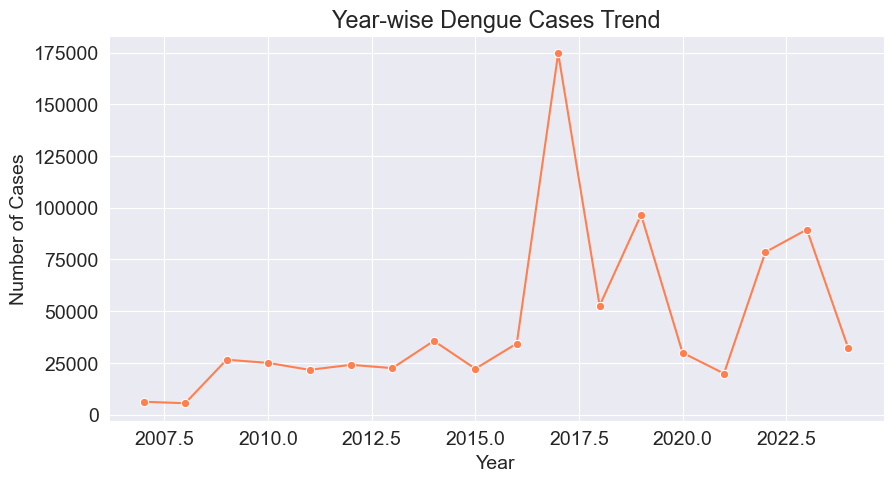

In [25]:
# Group the data by Year and sum the Number_of_Cases
yearly_cases = dengue_case_df.groupby("Year")["Number_of_Cases"].sum()

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_cases.index, y=yearly_cases.values, marker='o', color='coral')
plt.title("Year-wise Dengue Cases Trend")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

The plot shows fluctuations in dengue cases over the years.  
There might be spikes in certain years, which could be due to weather patterns or outbreaks.


<h2>Monthly trends</h2>

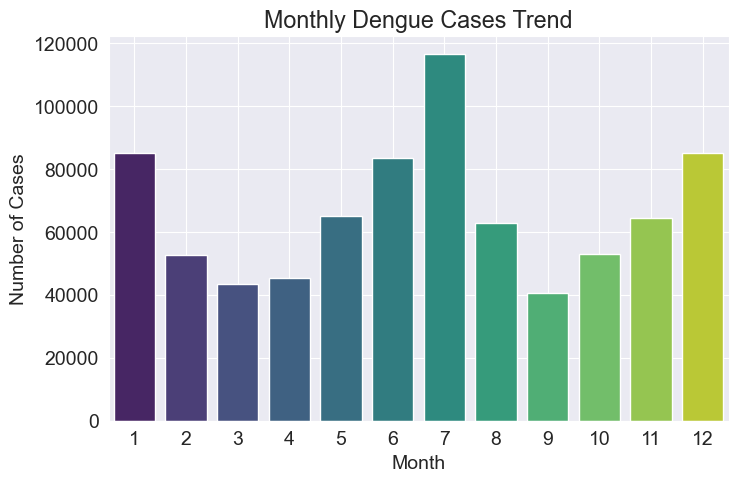

In [28]:
# Group the data by Month and sum the Number_of_Cases
monthly_cases = dengue_case_df.groupby("Month")["Number_of_Cases"].sum()

# Plot the trend
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_cases.index, y=monthly_cases.values, palette="viridis")
plt.title("Monthly Dengue Cases Trend")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

Certain months show higher dengue cases, possibly due to rainy seasons or weather patterns that favor mosquito breeding.  
Identifying peak months can help in proactive prevention strategies.

<h2>District-wise Dengue Cases</h2>

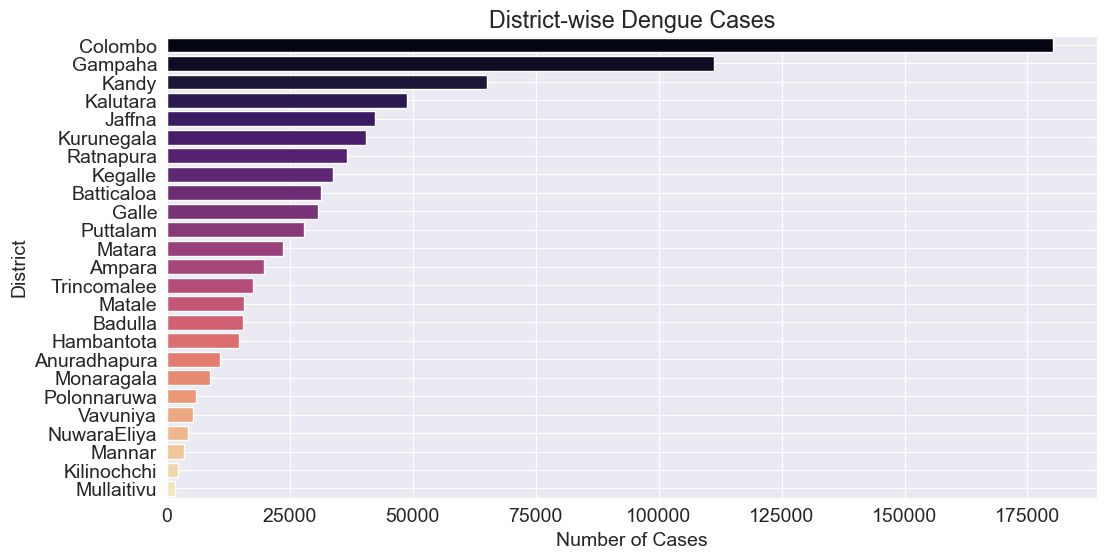

In [31]:
# Group the data by District and sum the Number_of_Cases
district_cases = dengue_case_df.groupby("District")["Number_of_Cases"].sum().sort_values(ascending=False)

# Plot the trend
plt.figure(figsize=(12, 6))
sns.barplot(x=district_cases.values, y=district_cases.index, palette="magma")
plt.title("District-wise Dengue Cases")
plt.xlabel("Number of Cases")
plt.ylabel("District")
plt.grid(True)
plt.show()


Certain districts have significantly higher dengue cases, which could be due to population density, climate conditions, or urban environments.  
This insight can help in targeting high-risk areas for preventive actions.

<h2>Weather Feature Relationships</h2>

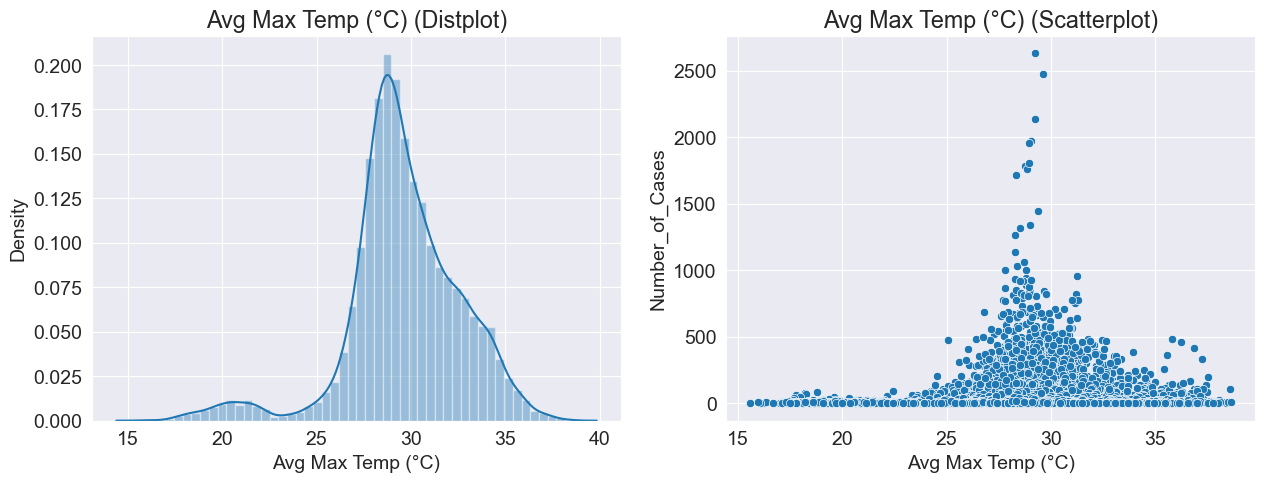

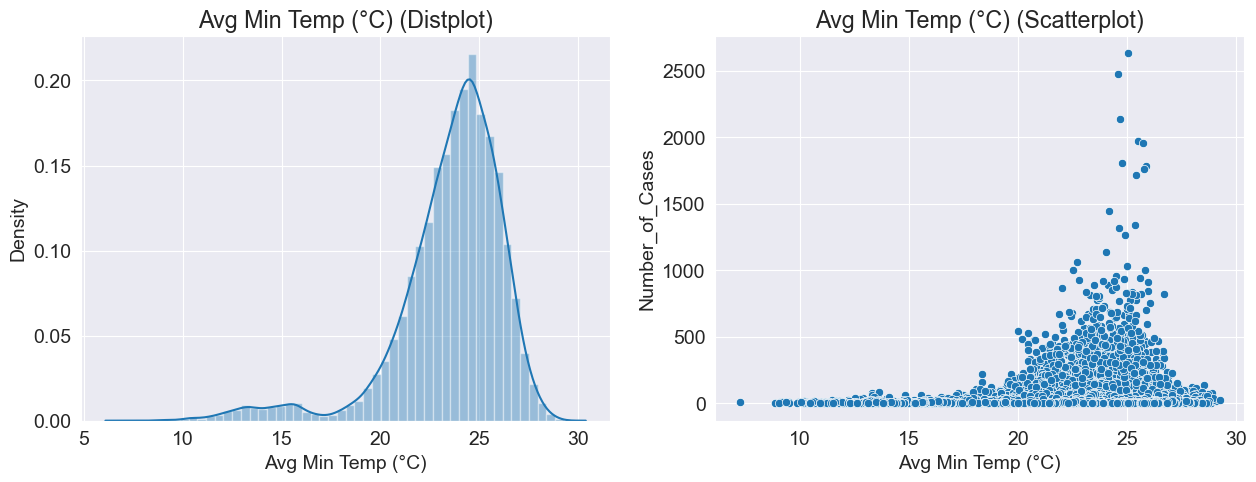

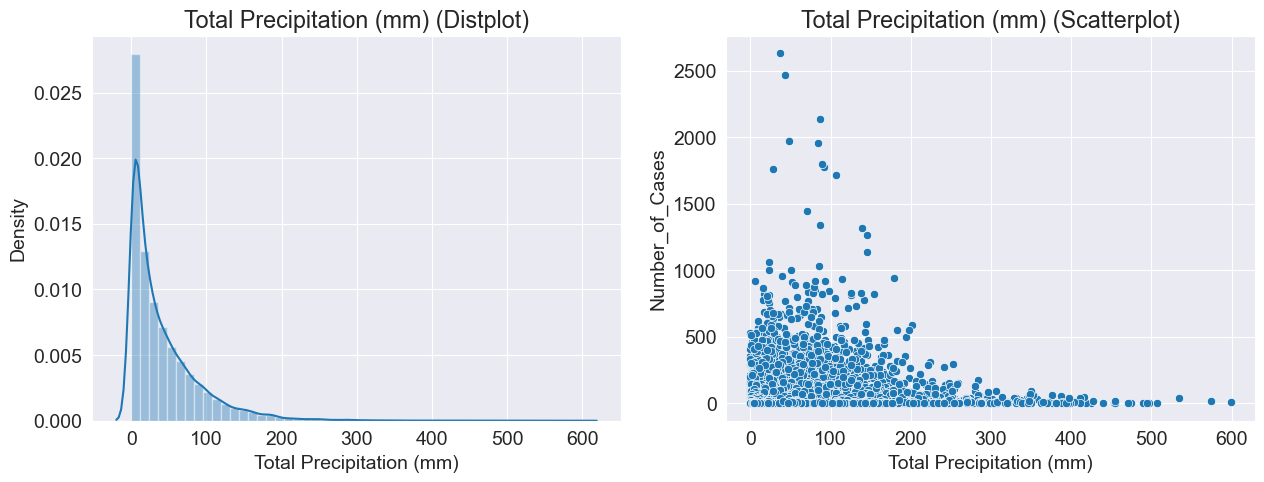

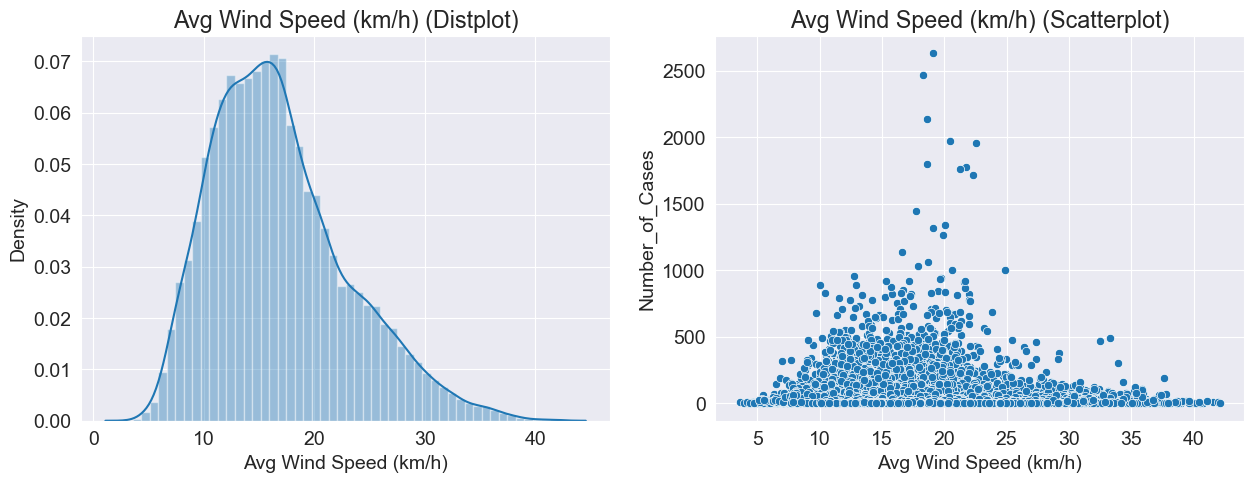

In [34]:
# Select key weather features and target variable
weather_features = [
    "Avg Max Temp (°C)", "Avg Min Temp (°C)", "Total Precipitation (mm)",
    "Avg Wind Speed (km/h)"
]
for i in weather_features:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    
    axes[0].set_title(i+' (Distplot)')
    sns.distplot(dengue_case_df[i], ax=axes[0])
    
    axes[1].set_title(i+' (Scatterplot)')
    sns.scatterplot(y=dengue_case_df['Number_of_Cases'], x=dengue_case_df[i], ax=axes[1])

- **Temperature (Max and Min)**: Shows some positive correlation with dengue cases, especially during warmer periods.  
- **Total Precipitation**: Clear spikes during heavy rainfall periods, which could lead to water stagnation and mosquito breeding.  
- **Wind Speed**: Weaker relationship, as wind speed may not directly affect mosquito activity.

### Why Wind Speed Has a Weaker Relationship with Dengue Cases?

- Mosquitoes are weak fliers. High wind speeds disrupt their flight and breeding activities.  
- During high wind conditions, mosquitoes struggle to find hosts (humans) to bite.  
- Breeding sites (like stagnant water) can dry up faster due to wind.

### Why Does Rainfall Increase Dengue Cases?

- Heavy rain creates water collection points, like puddles, clogged drains, or containers left outside.  
- Mosquitoes lay eggs in stagnant water.  
- After rain, larvae hatch and become adult mosquitoes, increasing the mosquito population.  
- More mosquitoes = higher chance of biting humans and spreading the dengue virus.

### Why Does Temperature Affect Dengue Cases?

- Mosquitoes are cold-blooded, meaning their activity depends on temperature.  
- In warmer temperatures (25°C to 32°C):  
  - Mosquitoes become more active.  
  - They bite humans more frequently.  
  - The dengue virus replicates faster inside the mosquito (shorter incubation period).  
- In colder temperatures (below 20°C), mosquito activity slows down, and the virus can't replicate efficiently.

- **More rain = more breeding sites = higher dengue cases**  
  But too much rain can wash away breeding sites, reducing cases.

- **Higher temperatures increase the risk of dengue outbreaks.**  
  But too much heat (above 34°C) can kill mosquitoes or dry out breeding sites.



<h2>Weekly Dengue Cases Trend</h2>

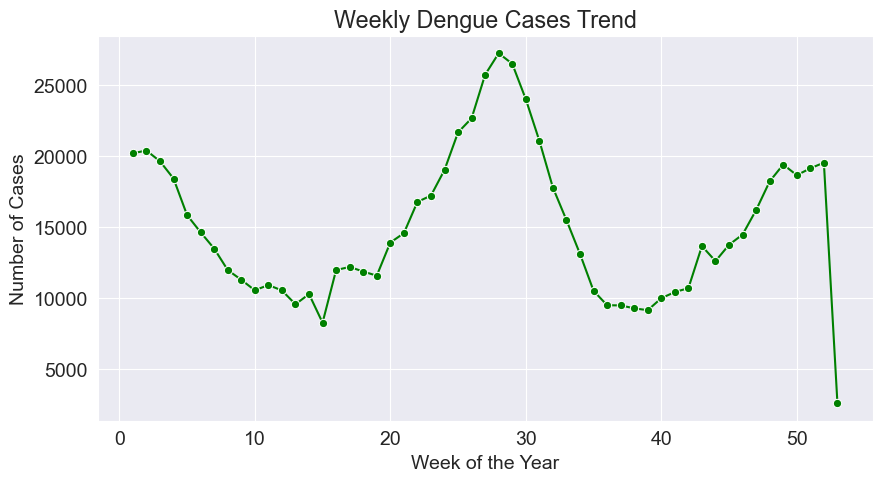

In [37]:
# Group the data by Week and sum the Number_of_Cases
weekly_cases = dengue_case_df.groupby("Week")["Number_of_Cases"].sum()

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=weekly_cases.index, y=weekly_cases.values, marker='o', color='green')
plt.title("Weekly Dengue Cases Trend")
plt.xlabel("Week of the Year")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

- **Cases start rising around Week 20-30**, which aligns with rainy seasons and warmer weather.  
- **Peaks appear mid-year**, likely due to ideal mosquito breeding conditions.  
- **Cases gradually decline towards the end of the year**, possibly due to cooler weather or preventive actions.

<h2>Seasonal patterns (Month + Year)</h2>

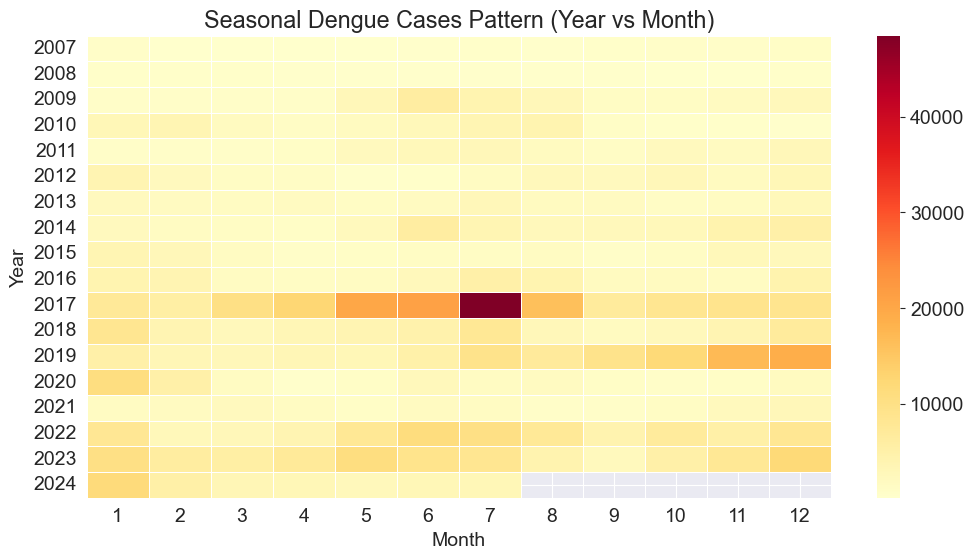

In [40]:
# Group data by Year and Month and sum the Number_of_Cases
seasonal_cases = dengue_case_df.groupby(["Year", "Month"])["Number_of_Cases"].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(seasonal_cases, cmap="YlOrRd", annot=False, linewidths=0.5)
plt.title("Seasonal Dengue Cases Pattern (Year vs Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


- **High cases are concentrated between May to October**, which aligns with Sri Lanka's monsoon season.  
- **Certain years show extreme spikes**, indicating outbreak years.  
- **Cases decrease towards the end of the year**, likely due to cooler and drier conditions.

<h2>Correlation Heatmap</h2>

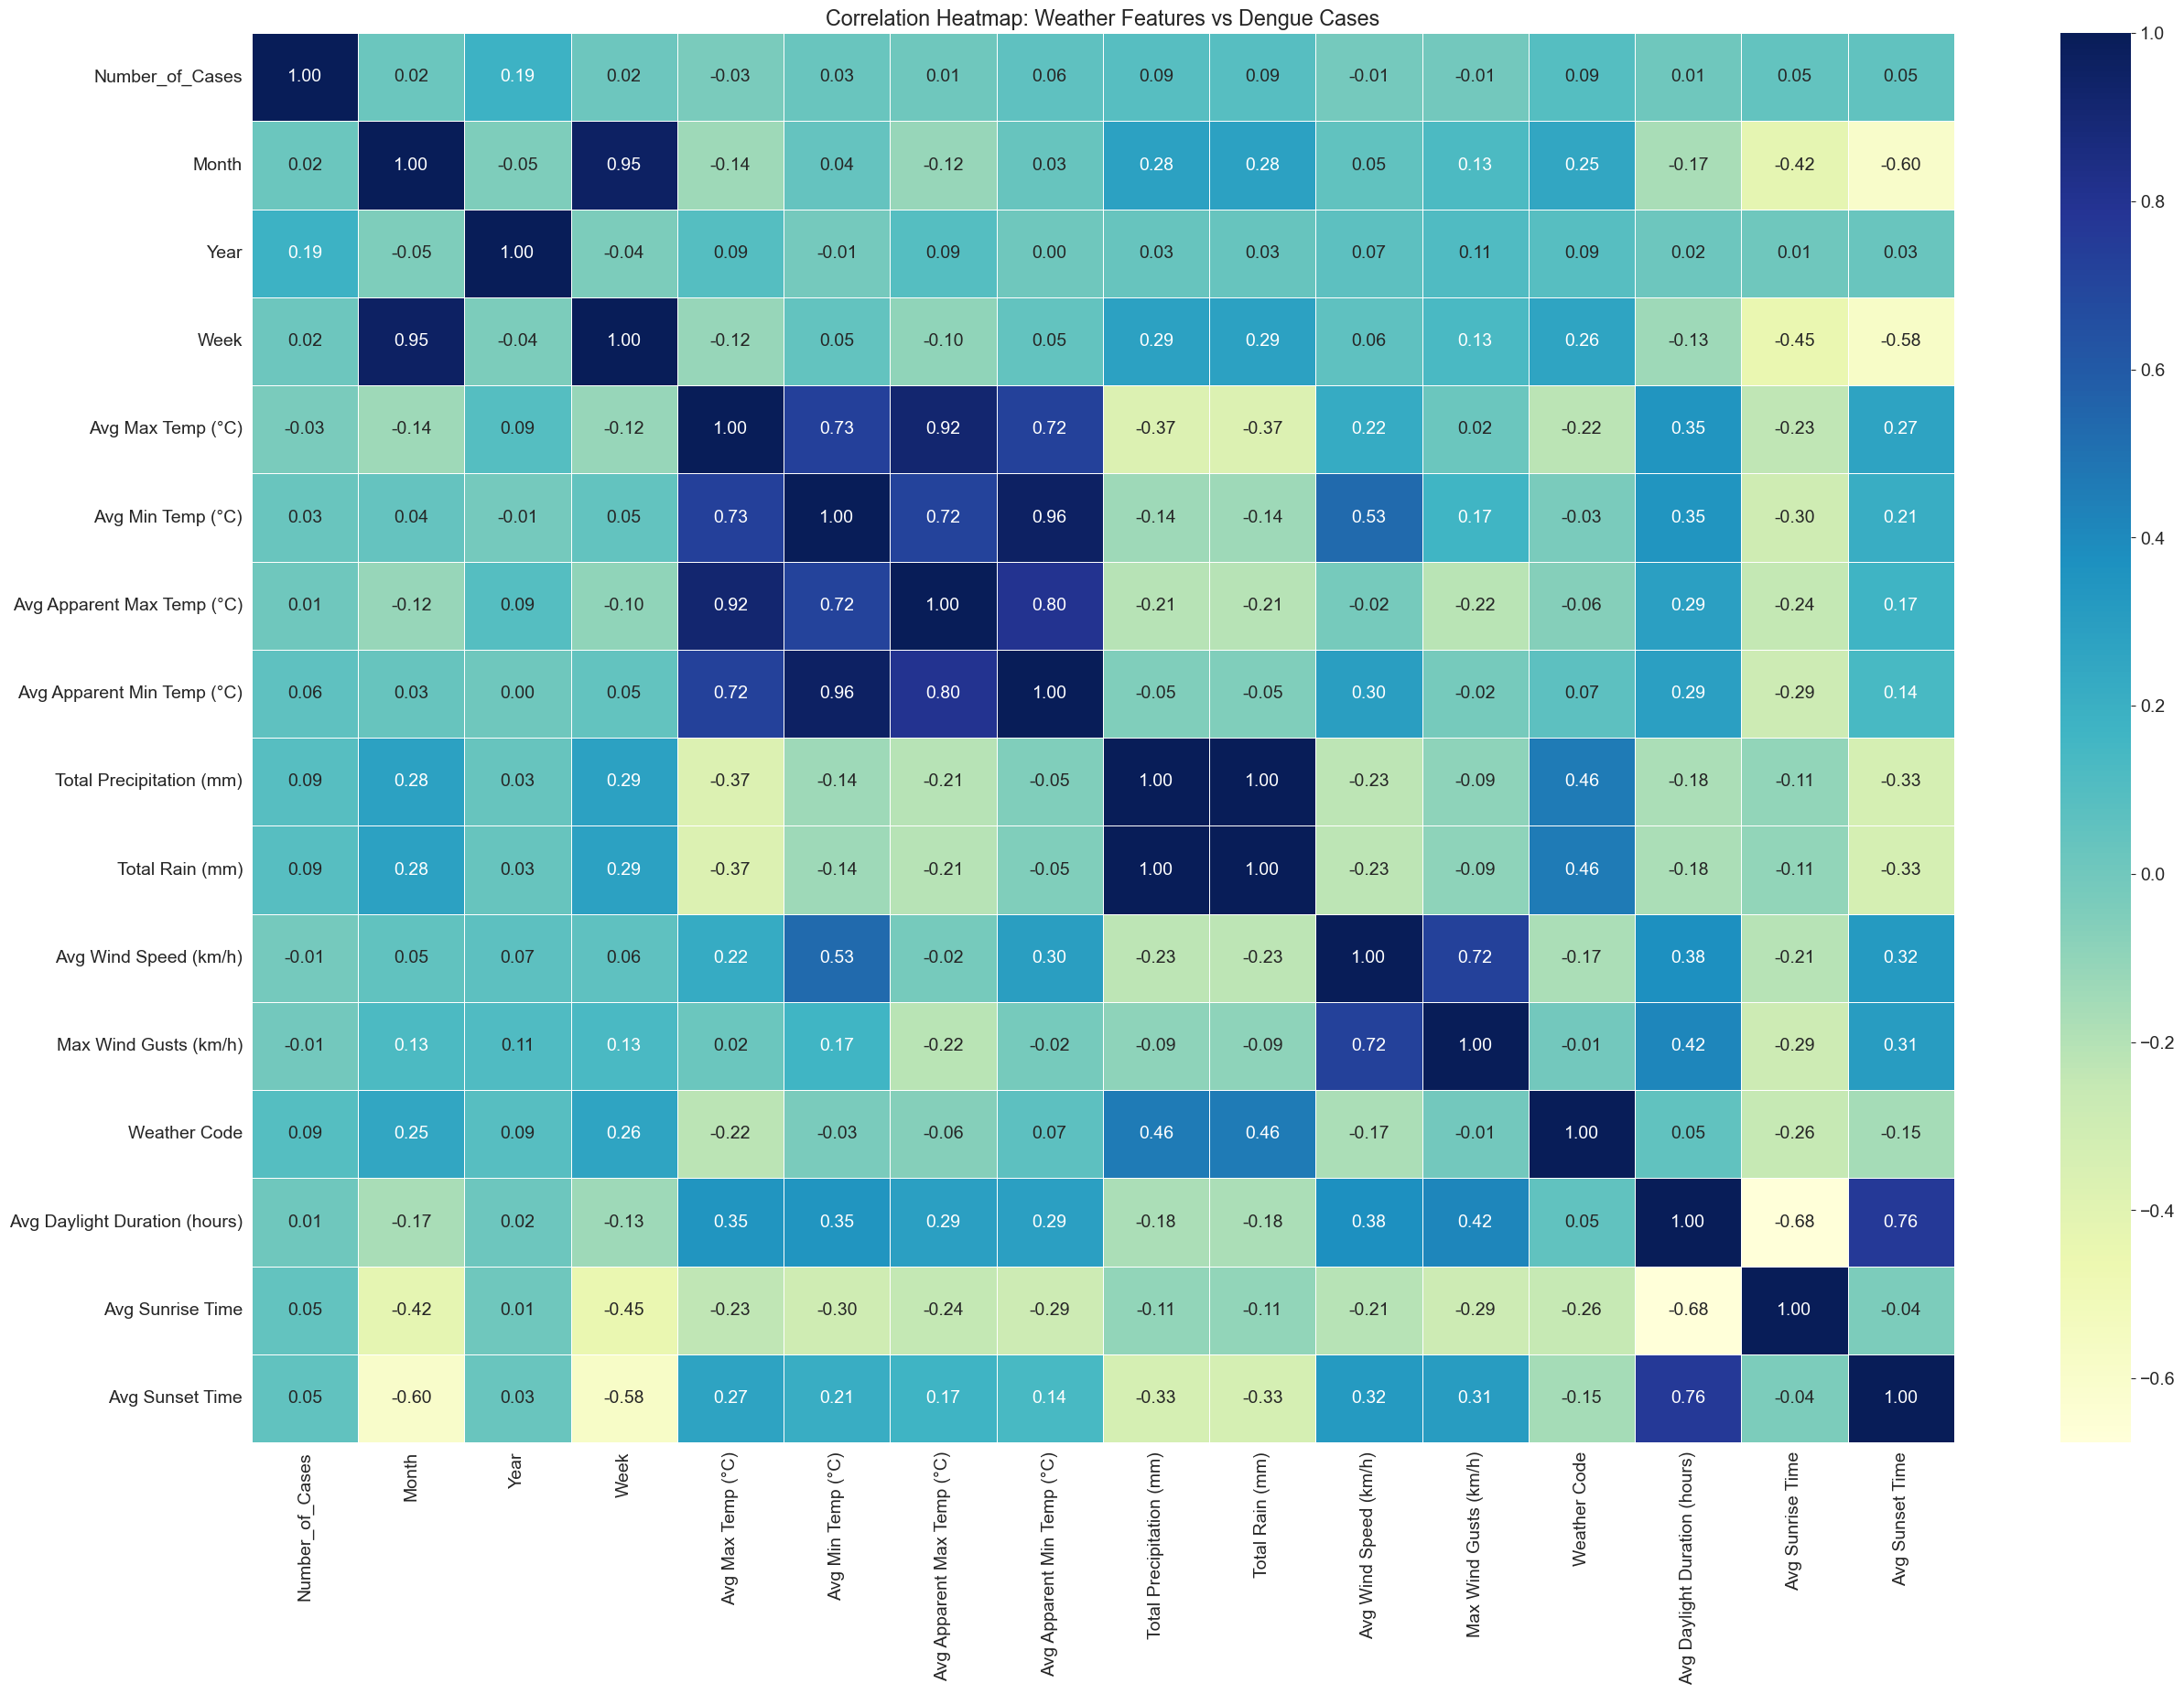

In [43]:
# Select only the numeric columns for correlation calculation
numeric_columns = dengue_case_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Weather Features vs Dengue Cases")
plt.show()


- **Number of Cases** is strongly influenced by Month and Week, confirming the seasonal pattern.  
- **Total Precipitation and Temperature (Max and Min)** show a moderate positive correlation.  
- **Year** has a slight correlation, indicating increasing cases over the years.

- **Wind speed** seems to have a weaker relationship with dengue cases.

<h2>Outlier Detection</h2>

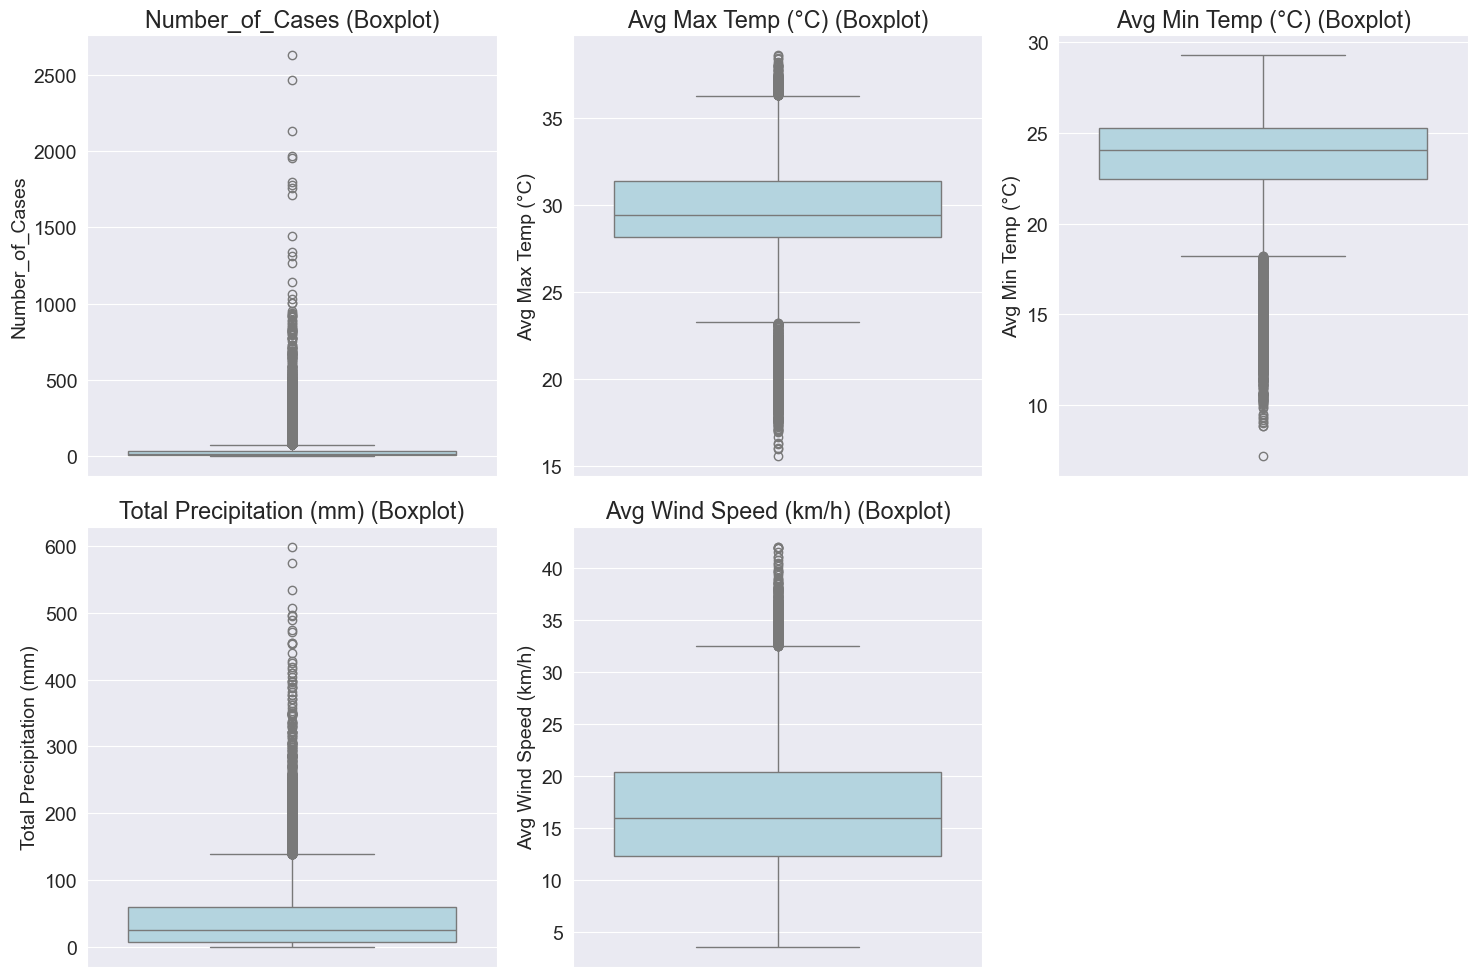

In [46]:
# Select key features for outlier detection
outlier_features = ["Number_of_Cases", "Avg Max Temp (°C)", "Avg Min Temp (°C)", 
                    "Total Precipitation (mm)", "Avg Wind Speed (km/h)"]

# Plot boxplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=dengue_case_df[feature], color="lightblue")
    plt.title(f"{feature} (Boxplot)")

plt.tight_layout()
plt.show()

- **Number of Dengue Cases** shows extreme spikes, which could be outbreak periods.  
- **Total Precipitation** has heavy outliers, likely due to unexpected heavy rainfall during monsoons.  
- **Temperature features (Max and Min)** show minor outliers, which could be due to unusual weather conditions.  
- **Wind Speed** also has some extreme values, possibly during storms or high wind seasons.


- **Outliers are real and important** (outbreak periods).  
- **Keeping them** will improve model performance for predicting sudden dengue spikes.


<span style="background-color:#4DA733;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> FEATURE ENGINEERING
</span>

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Identify and Substitute the widely distributed columns</span>

In [51]:
# Apply log transformation to all numeric columns
log_numeric_cols = numeric_columns.columns
dengue_case_df[log_numeric_cols] = np.log1p(dengue_case_df[log_numeric_cols])

# Check the transformed data
dengue_case_df[log_numeric_cols].head()


Number_of_Cases     Month      Year      Week  Avg Max Temp (°C)  \
0              0.0  0.693147  7.604894  0.693147           3.329970   
1              0.0  0.693147  7.604894  1.098612           3.308717   
2              0.0  0.693147  7.604894  1.386294           3.339765   
3              0.0  0.693147  7.604894  1.609438           3.322335   
4              0.0  0.693147  7.604894  1.791759           3.345068   

   Avg Min Temp (°C)  Avg Apparent Max Temp (°C)  Avg Apparent Min Temp (°C)  \
0           3.129498                    3.396185                    3.222868   
1           3.191505                    3.442419                    3.321432   
2           3.184802                    3.420183                    3.294447   
3           3.179615                    3.432373                    3.299995   
4           3.176490                    3.457893                    3.300456   

   Total Precipitation (mm)  Total Rain (mm)  Avg Wind Speed (km/h)  \
0                  2.197225         2.197225               2.954910   
1                  4.467057         4.467057               2.891760   
2                  1.410987         1.410987               3.053411   
3                  4.000034         4.000034               2.901422   
4                  2.219203         2.219203               2.904850   

   Max Wind Gusts (km/h)  Weather Code  Avg Daylight Duration (hours)  \
0               3.813307      1.386294                       2.542750   
1               3.797734      3.988984                       2.544223   
2               3.895894      3.951244                       2.545858   
3               3.772761      4.127134                       2.548142   
4               3.713572      3.951244                       2.550421   

   Avg Sunrise Time  Avg Sunset Time  
0          5.932245         6.984716  
1          5.937536         6.987490  
2          5.942799         6.990257  
3          5.945421         6.993015  
4          5.948035         6.994850

- **Extreme values (outliers)** are now reduced.  
- The data is more balanced and easier for the model to learn patterns.


<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Identify Inputs and Targets</span>

In [54]:
# Drop unnecessary columns
columns_to_drop = [
    "Total Rain (mm)", "Avg Apparent Max Temp (°C)", "Avg Apparent Min Temp (°C)",
    "Week_Start_Date", "Week_End_Date", "Avg Sunrise Time", "Avg Sunset Time", "Avg Daylight Duration (hours)"
]

# Cleaned dataset
data_cleaned = dengue_case_df.drop(columns=columns_to_drop)

# Show the first few rows to verify
data_cleaned.head()


District  Number_of_Cases     Month      Year      Week  Avg Max Temp (°C)  \
0   Ampara              0.0  0.693147  7.604894  0.693147           3.329970   
1   Ampara              0.0  0.693147  7.604894  1.098612           3.308717   
2   Ampara              0.0  0.693147  7.604894  1.386294           3.339765   
3   Ampara              0.0  0.693147  7.604894  1.609438           3.322335   
4   Ampara              0.0  0.693147  7.604894  1.791759           3.345068   

   Avg Min Temp (°C)  Total Precipitation (mm)  Avg Wind Speed (km/h)  \
0           3.129498                  2.197225               2.954910   
1           3.191505                  4.467057               2.891760   
2           3.184802                  1.410987               3.053411   
3           3.179615                  4.000034               2.901422   
4           3.176490                  2.219203               2.904850   

   Max Wind Gusts (km/h)  Weather Code  
0               3.813307      1.386294  
1               3.797734      3.988984  
2               3.895894      3.951244  
3               3.772761      4.127134  
4               3.713572      3.951244

| **Removed Column**                              | **Reason for Removal**                                  |
|-------------------------------------------------|---------------------------------------------------------|
| **Total Rain (mm)**                             | Duplicate of Total Precipitation (mm)                   |
| **Avg Apparent Max Temp (°C) & Avg Apparent Min Temp (°C)** | Similar to Avg Max Temp & Avg Min Temp                 |
| **Week_Start_Date & Week_End_Date**             | Already captured by Year, Month, and Week               |
| **Avg Sunrise Time, Avg Sunset Time, Avg Daylight Duration** | Irrelevant for dengue case prediction                 |


<h2>Separate Input and Target Data</h2>

In [57]:
# Separate Input (input_df) and Target (target_df)

input_df = data_cleaned.drop("Number_of_Cases", axis=1)
target_df = data_cleaned["Number_of_Cases"]

# Show the first few rows to verify
input_df.head()

District     Month      Year      Week  Avg Max Temp (°C)  \
0   Ampara  0.693147  7.604894  0.693147           3.329970   
1   Ampara  0.693147  7.604894  1.098612           3.308717   
2   Ampara  0.693147  7.604894  1.386294           3.339765   
3   Ampara  0.693147  7.604894  1.609438           3.322335   
4   Ampara  0.693147  7.604894  1.791759           3.345068   

   Avg Min Temp (°C)  Total Precipitation (mm)  Avg Wind Speed (km/h)  \
0           3.129498                  2.197225               2.954910   
1           3.191505                  4.467057               2.891760   
2           3.184802                  1.410987               3.053411   
3           3.179615                  4.000034               2.901422   
4           3.176490                  2.219203               2.904850   

   Max Wind Gusts (km/h)  Weather Code  
0               3.813307      1.386294  
1               3.797734      3.988984  
2               3.895894      3.951244  
3               3.772761      4.127134  
4               3.713572      3.951244

In [58]:
target_df.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Number_of_Cases, dtype: float64

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Identify Numeric and Categorical Data</span>

In [60]:
# Identify numeric and categorical columns
numeric_cols = input_df.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_cols = input_df.select_dtypes(include=["object"]).columns.tolist()

numeric_cols, categorical_cols

(['Month',
  'Year',
  'Week',
  'Avg Max Temp (°C)',
  'Avg Min Temp (°C)',
  'Total Precipitation (mm)',
  'Avg Wind Speed (km/h)',
  'Max Wind Gusts (km/h)',
  'Weather Code'],
 ['District'])

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Scalling Weather Data</span>

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Select only weather features for MinMax Scaling
weather_features = [
    "Avg Max Temp (°C)", "Avg Min Temp (°C)", 
    "Total Precipitation (mm)", "Avg Wind Speed (km/h)", 
    "Max Wind Gusts (km/h)", "Weather Code"
]

# Apply MinMax Scaling
scaler = MinMaxScaler()
input_df[weather_features] = scaler.fit_transform(input_df[weather_features])

# Show the scaled data
input_df[weather_features].head()

Avg Max Temp (°C)  Avg Min Temp (°C)  Total Precipitation (mm)  \
0           0.598531           0.785002                  0.343481   
1           0.574094           0.832544                  0.698313   
2           0.609793           0.827405                  0.220573   
3           0.589752           0.823428                  0.625305   
4           0.615890           0.821032                  0.346917   

   Avg Wind Speed (km/h)  Max Wind Gusts (km/h)  Weather Code  
0               0.639125               0.438024      0.330885  
1               0.610932               0.428639      0.952103  
2               0.683101               0.487796      0.943095  
3               0.615245               0.413589      0.985077  
4               0.616776               0.377918      0.943095

In [63]:
input_df.head()

District     Month      Year      Week  Avg Max Temp (°C)  \
0   Ampara  0.693147  7.604894  0.693147           0.598531   
1   Ampara  0.693147  7.604894  1.098612           0.574094   
2   Ampara  0.693147  7.604894  1.386294           0.609793   
3   Ampara  0.693147  7.604894  1.609438           0.589752   
4   Ampara  0.693147  7.604894  1.791759           0.615890   

   Avg Min Temp (°C)  Total Precipitation (mm)  Avg Wind Speed (km/h)  \
0           0.785002                  0.343481               0.639125   
1           0.832544                  0.698313               0.610932   
2           0.827405                  0.220573               0.683101   
3           0.823428                  0.625305               0.615245   
4           0.821032                  0.346917               0.616776   

   Max Wind Gusts (km/h)  Weather Code  
0               0.438024      0.330885  
1               0.428639      0.952103  
2               0.487796      0.943095  
3               0.413589      0.985077  
4               0.377918      0.943095

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Encode District</span>

In [65]:
from sklearn.preprocessing import OneHotEncoder

# Create the encoder with the correct parameter
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit the encoder to the categorical column (District)
encoder.fit(input_df[categorical_cols])

# Generate column names for each encoded category
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Transform and add the new one-hot encoded columns
input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

# Drop the original categorical column
input_df = input_df.drop(columns=categorical_cols)

# Show the updated input_df
input_df.head()


Month      Year      Week  Avg Max Temp (°C)  Avg Min Temp (°C)  \
0  0.693147  7.604894  0.693147           0.598531           0.785002   
1  0.693147  7.604894  1.098612           0.574094           0.832544   
2  0.693147  7.604894  1.386294           0.609793           0.827405   
3  0.693147  7.604894  1.609438           0.589752           0.823428   
4  0.693147  7.604894  1.791759           0.615890           0.821032   

   Total Precipitation (mm)  Avg Wind Speed (km/h)  Max Wind Gusts (km/h)  \
0                  0.343481               0.639125               0.438024   
1                  0.698313               0.610932               0.428639   
2                  0.220573               0.683101               0.487796   
3                  0.625305               0.615245               0.413589   
4                  0.346917               0.616776               0.377918   

   Weather Code  District_Ampara  District_Anuradhapura  District_Badulla  \
0      0.330885              1.0                    0.0               0.0   
1      0.952103              1.0                    0.0               0.0   
2      0.943095              1.0                    0.0               0.0   
3      0.985077              1.0                    0.0               0.0   
4      0.943095              1.0                    0.0               0.0   

   District_Batticaloa  District_Colombo  District_Galle  District_Gampaha  \
0                  0.0               0.0             0.0               0.0   
1                  0.0               0.0             0.0               0.0   
2                  0.0               0.0             0.0               0.0   
3                  0.0               0.0             0.0               0.0   
4                  0.0               0.0             0.0               0.0   

   District_Hambantota  District_Jaffna  District_Kalutara  District_Kandy  \
0                  0.0              0.0                0.0             0.0   
1                  0.0              0.0                0.0             0.0   
2                  0.0              0.0                0.0             0.0   
3                  0.0              0.0                0.0             0.0   
4                  0.0              0.0                0.0             0.0   

   District_Kegalle  District_Kilinochchi  District_Kurunegala  \
0               0.0                   0.0                  0.0   
1               0.0                   0.0                  0.0   
2               0.0                   0.0                  0.0   
3               0.0                   0.0                  0.0   
4               0.0                   0.0                  0.0   

   District_Mannar  District_Matale  District_Matara  District_Monaragala  \
0              0.0              0.0              0.0                  0.0   
1              0.0              0.0              0.0                  0.0   
2              0.0              0.0              0.0                  0.0   
3              0.0              0.0              0.0                  0.0   
4              0.0              0.0              0.0                  0.0   

   District_Mullaitivu  District_NuwaraEliya  District_Polonnaruwa  \
0                  0.0                   0.0                   0.0   
1                  0.0                   0.0                   0.0   
2                  0.0                   0.0                   0.0   
3                  0.0                   0.0                   0.0   
4                  0.0                   0.0                   0.0   

   District_Puttalam  District_Ratnapura  District_Trincomalee  \
0                0.0                 0.0                   0.0   
1                0.0                 0.0                   0.0   
2                0.0                 0.0                   0.0   
3                0.0                 0.0                   0.0   
4                0.0                 0.0                   0.0   

   District_Vavuniya  
0 

<span style="background-color:#4DA733;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> K FOLD CROSS VALIDATION
</span>

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Import Libraries for K Fold Cross Validation</span>

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Import Libraries for Models</span>

In [70]:
# Import Linear Models

from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor

# Import Tree-Based & Ensemble Models

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Import Support Vector Machine (SVM) Regressor

from sklearn.svm import SVR

# Import XGBoost Regressor

from xgboost import XGBRegressor


<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Cross Validation</span>

In [72]:
# Creating the list of models for cross validation

models = [

    ("Rg", Ridge()),
    ("Ls", Lasso()),
    ("EN", ElasticNet()),
    ("SGD", SGDRegressor()),
    ("DT", DecisionTreeRegressor()),
    ("RF", RandomForestRegressor()),
    ("GB", GradientBoostingRegressor()),
    ("SVR", SVR()),
    ("XGB", XGBRegressor())
    
]

# Evaluae the created models

results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=20)
    cv_results = cross_val_score(model, input_df, target_df, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" %(name, cv_results.mean(), cv_results.std()))

Rg: -0.601629 (1.642520)
Ls: -0.507455 (0.739044)
EN: -0.507455 (0.739044)
SGD: -0.469894 (0.930673)
DT: -0.407716 (0.837125)
RF: -0.025817 (0.701822)
GB: 0.077766 (0.670650)
SVR: -0.389140 (0.721448)
XGB: 0.187012 (0.650976)


<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Compare Models</span>

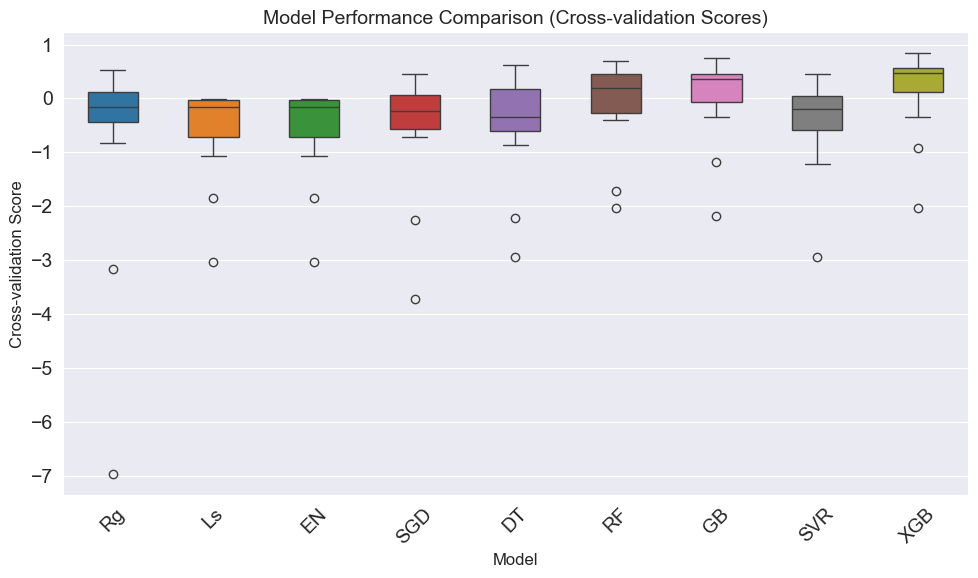

In [74]:
# Create box plot for the cross-validation results of each model
plt.figure(figsize=(10, 6))
sns.boxplot(data=results, width=0.5)

# Add model names as x-axis labels
plt.xticks(np.arange(len(names)), names, rotation=45)

# Add titles and labels
plt.title("Model Performance Comparison (Cross-validation Scores)", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Cross-validation Score", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

<span style="background-color:#4DA733;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> MODEL TRAINING
</span>

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Split The Dataset Into Training and Validation</span>

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(input_df, target_df, test_size=0.25, random_state=42)

<h2>XGBOOST Model Training</h2>

In [80]:
xgboost_model = XGBRegressor()

In [81]:
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<h2>GradientBoost Regressor model Training</h2>

In [83]:
gb_model = GradientBoostingRegressor()

In [84]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

<span style="background-color:#4DA733;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> MODEL EVALUATING
</span>

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Import Libraries for Evaluating</span>

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
xgboost_predictions = xgboost_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Function to compute evaluation metrics
def evaluate_model(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Directly using sqrt(MSE)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Performance Metrics for {model_name}:")
    print(f"  - R² Score: {r2:.4f}")
    print(f"  - MSE: {mse:.4f}")
    print(f"  - RMSE: {rmse:.4f}")
    print(f"  - MAE: {mae:.4f}")
    print("-" * 40)

# Evaluate both models on test data
evaluate_model("XGBoost Regression", y_test, xgboost_predictions)
evaluate_model("Gradient Boosting Regressor", y_test, gb_predictions)

# Compute RMSE on training data
train_preds_xgb = xgboost_model.predict(X_train)
train_preds_gb = gb_model.predict(X_train)

train_rmse_xgb = mean_squared_error(y_train, train_preds_xgb, squared=False)
train_rmse_gb = mean_squared_error(y_train, train_preds_gb, squared=False)

print(f"The RMSE for XGBOOST Regression on training data: {train_rmse_xgb:.4f}")
print(f"The RMSE for Gradient Boosting on training data: {train_rmse_gb:.4f}")


Performance Metrics for XGBoost Regression:
  - R² Score: 0.8223
  - MSE: 0.4218
  - RMSE: 0.6495
  - MAE: 0.4960
----------------------------------------
Performance Metrics for Gradient Boosting Regressor:
  - R² Score: 0.6861
  - MSE: 0.7451
  - RMSE: 0.8632
  - MAE: 0.6775
----------------------------------------
The RMSE for XGBOOST Regression on training data: 0.4617
The RMSE for Gradient Boosting on training data: 0.8519


<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Train and Test Predicted Data Visualization</span>

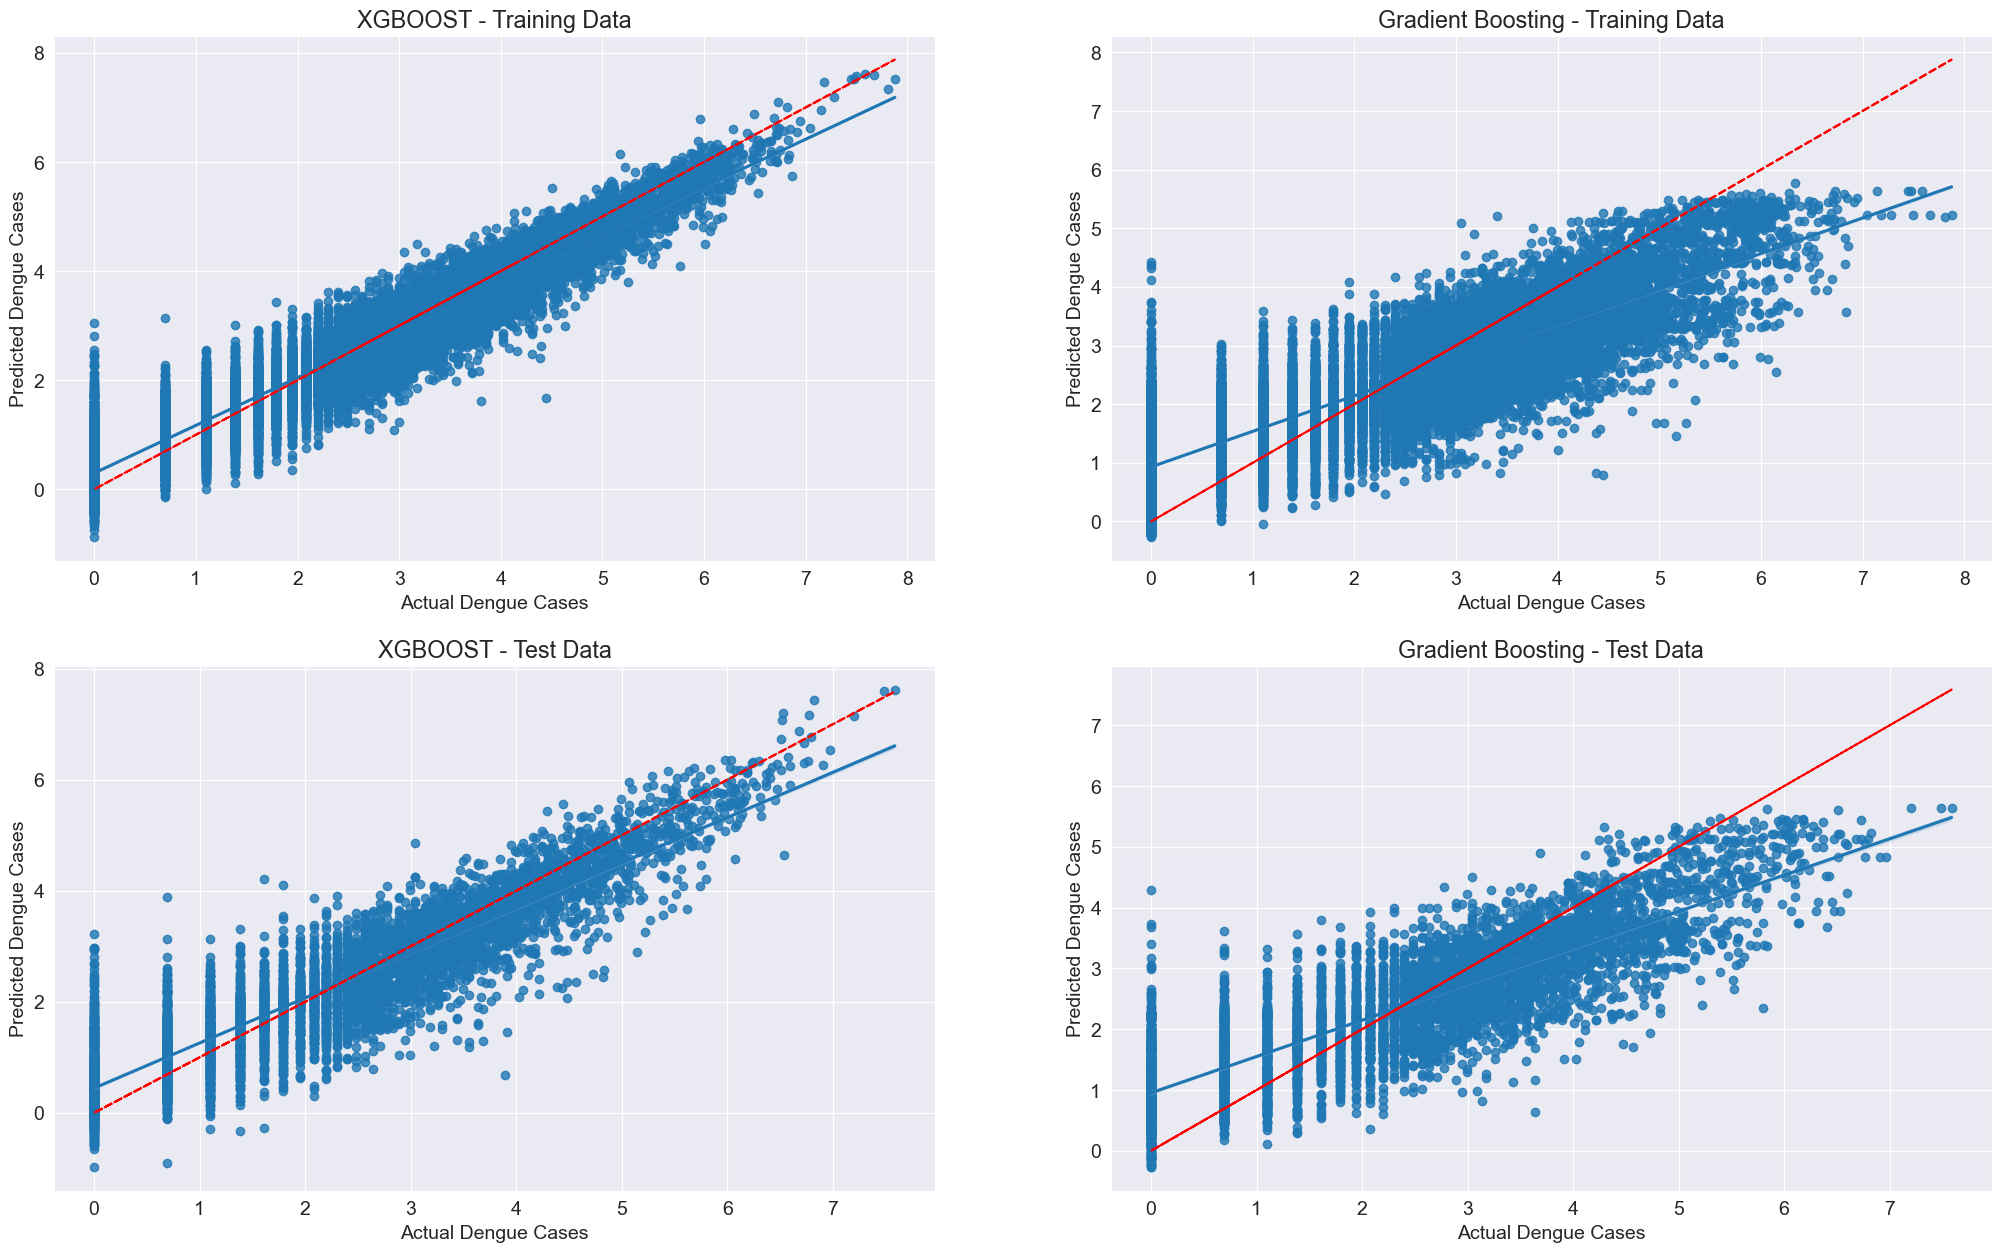

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(25, 15))

# Define a function to add a reference trendline (y = x)

def plot_regression(ax, x, y, title):
    sns.regplot(x=x, y=y, ax=ax)  # Regression plot
    ax.plot(x, x, color="red", linestyle="--")  # Reference line (Perfect predictions)
    ax.set_title(title)
    ax.set_xlabel("Actual Dengue Cases")
    ax.set_ylabel("Predicted Dengue Cases")

# Ridge Regression - Training Data
plot_regression(axes[0, 0], y_train, train_preds_xgb, "XGBOOST - Training Data")

# Gradient Boosting - Training Data
plot_regression(axes[0, 1], y_train, train_preds_gb, "Gradient Boosting - Training Data")

# Ridge Regression - Test Data
plot_regression(axes[1, 0], y_test, xgboost_predictions, "XGBOOST - Test Data")

# Gradient Boosting - Test Data
plot_regression(axes[1, 1], y_test, gb_predictions, "Gradient Boosting - Test Data")

plt.show()


<span style="background-color:#4DA733;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> Hyperparameters Tuning
</span>

In [92]:
# Defininf the RMSE function

def rmse(preds, targets):
    return mean_squared_error(preds, targets, squared = False)

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">GradientBoosting Regressor Hyperparameters Tuning</span>

In [94]:
gbmodel = GradientBoostingRegressor(random_state=42)
parameters = {
    'learning_rate':[0.01, 0.1, 0.2],
    'n_estimators':[200,240,260],
    'max_depth':[2,3,4],
    'max_features':[152,163,174]
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbmodel,parameters, cv=5)

In [ ]:
#finding the best parameters

cv.fit(input_df,target_df.values.ravel())
cv.best_params_

In [ ]:
#training with best parameters

gb_best_model =  GradientBoostingRegressor(random_state=42,
                                   learning_rate=cv.best_params_['learning_rate'],
                                   max_depth=cv.best_params_['max_depth'],
                                   n_estimators=cv.best_params_['n_estimators'],
                                   max_features=cv.best_params_['max_features'])
gb_best_model.fit(X_train, y_train)
tuned_train_preds_gb_model = gb_best_model.predict(X_train)
tuned_test_preds_gb_model = gb_best_model.predict(X_test)
rmse(tuned_train_preds_gb_model, y_train), rmse(tuned_test_preds_gb_model, y_test)

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">XGBOOST Hyperparameters Tuning</span>

In [ ]:
# Initialize XGBoost model
xgboost_model = XGBRegressor(random_state=42)
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [200, 240, 260],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Set up GridSearchCV
cv = GridSearchCV(xgboost_model, parameters, cv=5, scoring='neg_mean_squared_error')

# Fit the model with the training data
cv.fit(input_df, target_df.values.ravel())

# Get the best hyperparameters
best_params = cv.best_params_
print(f"Best hyperparameters: {best_params}")

In [ ]:
# Train the model with the best hyperparameters
best_xgboost_model = XGBRegressor(
    random_state=42,
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    min_child_weight=best_params['min_child_weight']
)

# Train the tuned model
best_xgboost_model.fit(X_train, y_train)

# Make predictions on the training and test sets
tuned_train_preds_xgb = best_xgboost_model.predict(X_train)
tuned_test_preds_xgb = best_xgboost_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error) for both training and test data
train_rmse = np.sqrt(mean_squared_error(y_train, tuned_train_preds_xgb))
test_rmse = np.sqrt(mean_squared_error(y_test, tuned_test_preds_xgb))

print(f"RMSE for Training Data: {train_rmse:.4f}")
print(f"RMSE for Test Data: {test_rmse:.4f}")

<span style="background-color:#4DA733 ; color: white; padding:25px 80px; text-align: center; border-radius: 5%; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold; font-size:20px;">Compare Tuned Models and Untuned Models</span>

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(20, 10))

axes[0,0].set_title('XGB Model')
sns.regplot(x=y_test, y=xgboost_predictions, ax=axes[0,0])
axes[0,0].set_ylabel('Predicted Dengue Cases (Untuned)')

axes[0,1].set_title('GradientBoostingRegressor')
sns.regplot(x=y_test, y=gb_predictions, ax=axes[0,1])
axes[0,1].set_ylabel('Predicted Dengue Cases (Untuned)')

sns.regplot(x=y_test, y=tuned_test_preds_xgb, ax=axes[1,0])
axes[1,0].set_ylabel('Predicted Dengue Cases (Tuned)')

sns.regplot(x=y_test, y=tuned_test_preds_gb_model, ax=axes[1,1])
axes[1,1].set_ylabel('Predicted Dengue Cases (Tuned)');

In [ ]:
# Function to evaluate model
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 30)

# Evaluate both models
evaluate_model("Tuned XGB Regression", y_test, tuned_test_preds_xgb)
evaluate_model("Tuned Gradient Boosting Regressor", y_test, tuned_test_preds_gb_model)

<span style="background-color:#4DA733;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> SAVE MODEL AS PICKLE FILE
</span>